# ANN (Artificial Neural Network; 신경망) & SOM
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

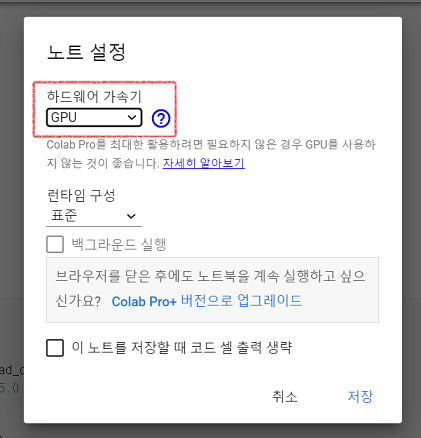

- Import
  - Keras
  - Pytorch
- [용어](https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8)
    - epoch: 전체 트레이닝 셋이 신경망을 통과한 횟수
    - batch: 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때 batch size는 하나의 소그룹에 속하는 데이터 수

> 전체 2000 개의 데이터가 있고, epochs = 20, batch_size = 500이라고 가정: 1 epoch는 각 데이터의 size가 500인 batch가 들어간 네 번의 iteration으로 나누어짐.전체 데이터셋에 대해서는 20 번의 학습이 이루어졌으며, iteration 기준으로 보자면 총 80 번의 학습이 이루어진 것.

- [Activation](https://ganghee-lee.tistory.com/32)
  - 노드에 들어오는 값들을 곧바로 다음 레이어로 전달하지 않고, 주로 비선형 함수(활성화 함수(Activation Function))를 통과시켜 전달 ([참고](https://wooono.tistory.com/209))
  - sigmoid, tanh, ReLU, softmax, ...
  - "Hidden layer에서 어떤 활성화 함수를 사용할지 모르겠으면 ReLU를 사용하면 된다" - Andrew ng

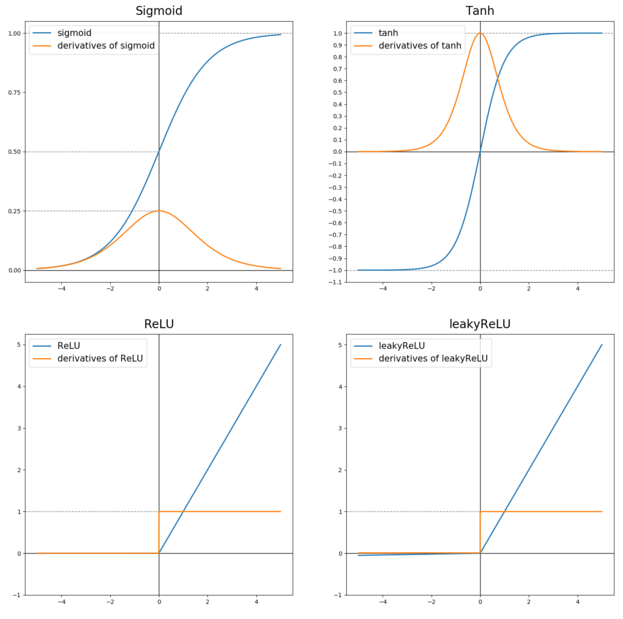

- Layer
  - Flatten layer: 1차원 자료로 바꿔주는 layer
  - Dense layer (Fully Connected layer): 이전 계층의 모든 뉴런과 결합된 형태의 layer (pytorch에서는 Linear layer)
  - Dropout layer: 네트워크가 과적합되는 경우를 방지하기 위해서 만들어진 레이어로 학습 과정에서 무작위로 뉴런의 집합을 제거
- [Optimizer](https://keras.io/api/optimizers/)
  - sgd, RMSprop, adam, ...
  - Adam을 가장 자주 씀
  - [참고](https://velog.io/@yookyungkho/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-%EC%A0%95%EB%B3%B5%EA%B8%B0%EB%B6%80%EC%A0%9C-CS231n-Lecture7-Review)

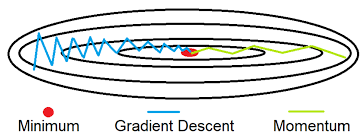

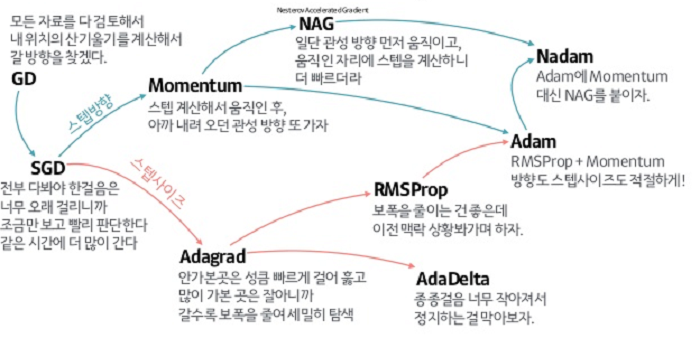

- [Loss](https://keras.io/api/losses/)
  - Regression: MSE, RSMSE, MAPE, ...
  - Classification: binary crossentropy, categorical crossentropy
  - train(훈련)에서 weight를 update하는 용도, [metrics](https://keras.io/api/metrics/regression_metrics/)은 validation을 통한 성능 평가용

# Regression

In [ ]:
import pandas as pd
import pandas as pd 
from google.colab import files

myfile = files.upload()
dataset = pd.read_csv('California_Houses.csv')
dataset=dataset.drop(['Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco', 'Latitude', 'Longitude'],axis=1)
dataset.head()

# https://www.kaggle.com/harlfoxem/housesalesprediction
# This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
# information link: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

Saving California_Houses.csv to California_Houses.csv


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,452600.0,8.3252,41,880,129,322,126,9263.040773
1,358500.0,8.3014,21,7099,1106,2401,1138,10225.733070
2,352100.0,7.2574,52,1467,190,496,177,8259.085109
3,341300.0,5.6431,52,1274,235,558,219,7768.086571
4,342200.0,3.8462,52,1627,280,565,259,7768.086571


In [ ]:
dataset.shape

(20640, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Distance_to_coast   20640 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [ ]:
dataset.isnull().sum() #결측치확인

Median_House_Value    0
Median_Income         0
Median_Age            0
Tot_Rooms             0
Tot_Bedrooms          0
Population            0
Households            0
Distance_to_coast     0
dtype: int64

In [ ]:
dataset_new = dataset

In [ ]:
dataset_new

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,452600.0,8.3252,41,880,129,322,126,9263.040773
1,358500.0,8.3014,21,7099,1106,2401,1138,10225.733070
2,352100.0,7.2574,52,1467,190,496,177,8259.085109
3,341300.0,5.6431,52,1274,235,558,219,7768.086571
4,342200.0,3.8462,52,1627,280,565,259,7768.086571
...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,162031.481100
20636,77100.0,2.5568,18,697,150,356,114,160445.433500
20637,92300.0,1.7000,17,2254,485,1007,433,153754.341200
20638,84700.0,1.8672,18,1860,409,741,349,152005.022200


In [ ]:
# Features와 target 나누기
features = dataset_new[dataset_new.columns[1:]]
target = dataset_new[dataset_new.columns[0]]
features

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,8.3252,41,880,129,322,126,9263.040773
1,8.3014,21,7099,1106,2401,1138,10225.733070
2,7.2574,52,1467,190,496,177,8259.085109
3,5.6431,52,1274,235,558,219,7768.086571
4,3.8462,52,1627,280,565,259,7768.086571
...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,162031.481100
20636,2.5568,18,697,150,356,114,160445.433500
20637,1.7000,17,2254,485,1007,433,153754.341200
20638,1.8672,18,1860,409,741,349,152005.022200


In [ ]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    features, target, test_size = 0.2, random_state = 2021)

In [ ]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(16512, 7)
(16512,)
(4128, 7)
(4128,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
print(train_features.shape[1])

7


In [36]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(128, activation = 'relu', input_shape = (train_features.shape[1],))) # (number of nodes, activation function, input shape)
# model.add(layers.Dense(256, activation = 'relu'))
# model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu')) # (number of nodes, activation function, input shape)
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
nadam = tf.keras.optimizers.Nadam(learning_rate=0.004)

# Loss Function
model.compile(optimizer=nadam, loss='mse', metrics=['mape'])


es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=70, batch_size=16, validation_split=0.2
 ,callbacks=[es,lr])
 



# Callback
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53

# Tuning the ANN
# !pip install scikeras
# import scikeras
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense
# def build_regression():
#     regression = models.Sequential()
#     regression.add(layers.Dense(128,  activation = 'relu', input_shape =(train_features.shape[1],)))
#     regression.add(layers.Dense( 64,  activation = 'relu'))
#     regression.add(layers.Dense(32,   activation = 'relu'))
#     regression.add(layers.Dense(16,  activation = 'relu'))
#     regression.add(layers.Dense(8,  activation = 'relu'))
#     regression.add(layers.Dense(1))
#     regression.compile(optimizer = adam , loss = 'mse', metrics = ['mape'])
#     return regression
# classifier = KerasRegressor(build_fn = build_regression)
# parameters = [{'batch_size': [8,16,32,64,128,256],
#               'epochs': [73]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'r2',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(train_features, train_target)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

Epoch 1/70
826/826 [==============================] - 8s 7ms/step - loss: 9325458432.0000 - mape: 35.4559 - val_loss: 4471589376.0000 - val_mape: 25.1851 - lr: 0.0040
Epoch 2/70
826/826 [==============================] - 6s 7ms/step - loss: 4690783744.0000 - mape: 27.5378 - val_loss: 4297058816.0000 - val_mape: 25.3787 - lr: 0.0040
Epoch 3/70
826/826 [==============================] - 5s 6ms/step - loss: 4661160448.0000 - mape: 27.4198 - val_loss: 4429489664.0000 - val_mape: 28.7064 - lr: 0.0040
Epoch 4/70
826/826 [==============================] - 4s 5ms/step - loss: 4622210560.0000 - mape: 27.3883 - val_loss: 4295204864.0000 - val_mape: 25.7447 - lr: 0.0040
Epoch 5/70
826/826 [==============================] - 4s 5ms/step - loss: 4578010112.0000 - mape: 27.2341 - val_loss: 4238870272.0000 - val_mape: 27.2040 - lr: 0.0040
Epoch 6/70
826/826 [==============================] - 4s 5ms/step - loss: 4586369536.0000 - mape: 27.1872 - val_loss: 4161940992.0000 - val_mape: 27.3944 - lr: 0.004

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-traina

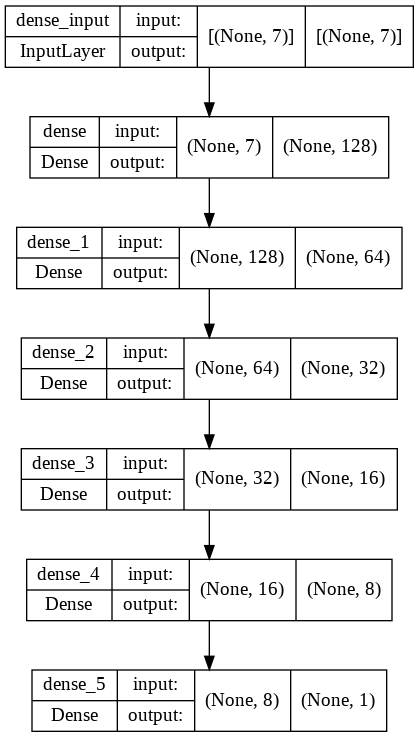

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-7.44124576e-02,  8.36749792e-01,  9.70488667e-01,
          4.00988251e-01, -3.96651626e-01,  1.85808927e-01,
          1.31338206e-03, -4.95704710e-01, -2.14247793e-01,
          1.13702081e-01, -1.14756048e+00, -5.24083190e-02,
          2.03644589e-01, -1.15048997e-01,  3.16646516e-01,
          7.66951799e-01,  3.85774463e-01, -2.73818880e-01,
         -8.77912939e-01,  1.35578942e+00,  1.72719076e-01,
         -4.22706455e-01,  8.98917198e-01,  1.13407409e+00,
          1.39738426e-01,  1.16871104e-01, -1.22471404e+00,
          2.95791000e-01, -2.60452151e-01, -3.44724774e-01,
          5.66643655e-01, -5.80938280e-01,  2.67123193e-01,
          2.16056633e+00,  3.48721966e-02, -1.88296512e-01,
          7.39050329e-01,  3.57717425e-01,  1.34920883e+00,
         -2.98704565e-01, -1.71310544e-01,  1.19534945e+00,
          1.18884611e+00,  4.93130237e-01,  1.41864195e-01,
          1.73969603e+00,  1.70701414e-01,  2.76245058e-01,
          2.17445755e+00, -1.67069793e-0

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.074412,0.836750,0.970489,0.400988,-0.396652,0.185809,0.001313,-0.495705,-0.214248,0.113702,...,0.270439,-0.002940,1.044561,0.061503,0.116731,1.127397,1.457313,0.254123,0.303636,0.835158
1,-0.801599,-0.094384,-0.459603,-0.468642,0.360632,1.156061,-0.285749,0.748649,-0.031612,-0.965026,...,-0.375924,-0.198030,-0.102539,-0.024953,0.952671,0.485612,0.688932,-0.056479,-0.066041,1.500008
2,-0.806274,-1.818700,0.999303,1.729959,0.561075,-2.670758,-0.581968,0.638787,-0.168612,0.163024,...,0.106901,-1.697679,-0.383943,0.455899,-2.350020,-0.383354,-0.282530,-0.216603,-0.230096,0.005331
3,-0.224576,0.900179,0.348436,0.143727,-0.845555,1.013203,0.132030,-0.780873,-0.356038,-0.058989,...,-0.520938,2.056872,0.147120,-0.394529,0.672028,1.214507,0.019554,-0.363507,-0.333610,0.333216
4,0.415835,-0.788815,-1.708744,-2.672871,0.021235,0.008705,-0.238989,-0.001723,0.116806,-0.134614,...,0.185145,-2.019336,-0.246938,0.048248,0.029407,-0.479953,0.153483,0.393450,0.264590,0.078712
5,-0.255259,0.986382,-0.022065,-0.157109,0.159338,0.524806,-0.271715,0.052288,0.013396,-0.207587,...,0.117917,1.389288,0.597434,-0.109744,0.015643,0.872570,-0.207371,0.157123,0.213480,-0.212591
6,0.229869,-0.110913,0.059514,-0.168684,-0.494483,-0.308914,-0.536636,-0.511380,-0.018121,0.556043,...,-1.128031,-0.552229,0.208736,-1.189472,-0.541874,-0.359458,-0.746870,-0.089321,0.254367,-1.240803


In [ ]:
pd.DataFrame(model.get_weights()[1]).transpose()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,2.072579,0.405655,0.699791,-0.008973,2.196432,0.065543,0.876598,2.005452,1.528418,1.852919,...,1.416186,-0.291114,1.182574,0.962072,-0.246955,0.05532,1.038506,1.442017,1.354282,0.698332


In [ ]:
pd.DataFrame(model.get_weights()[10])

,0
0,0.664546
1,0.983061
2,1.130533
3,0.298892
4,0.991946
5,-0.683861
6,-0.579053
7,-0.623344


In [ ]:
pd.DataFrame(model.get_weights()[11])

,0
0,2.528277


In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [ ]:
reg_history.history

{'loss': [9325459456.0,
  4690760704.0,
  4661322752.0,
  4622332416.0,
  4577938432.0,
  4586204672.0,
  4574027264.0,
  4547681280.0,
  4549620736.0,
  4531688960.0,
  4479050240.0,
  4418140160.0,
  4288203264.0,
  4176872960.0,
  4074024704.0,
  3989562368.0,
  3948000768.0,
  3892973568.0,
  3878545152.0,
  3819423232.0,
  3788753664.0,
  3781027072.0,
  3741858048.0,
  3718977536.0,
  3704817920.0,
  3693686528.0,
  3656886016.0,
  3641688064.0,
  3638652928.0,
  3636294912.0,
  3614465792.0,
  3605715456.0,
  3585988096.0,
  3579716608.0,
  3576372992.0,
  3550249472.0,
  3561922048.0,
  3553786624.0,
  3543465984.0,
  3536719104.0,
  3521373696.0,
  3518445568.0,
  3513496320.0,
  3503474944.0,
  3505385216.0,
  3497499648.0,
  3480610048.0,
  3512519936.0,
  3483963136.0,
  3466495488.0,
  3453428224.0,
  3470109440.0,
  3450627328.0,
  3445767936.0,
  3442574080.0,
  3437338112.0,
  3449796864.0,
  3413822464.0,
  3417347584.0,
  3409252096.0,
  3409569024.0,
  3398272768.0,


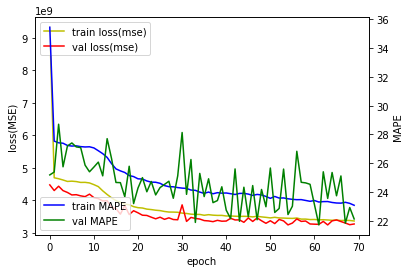

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

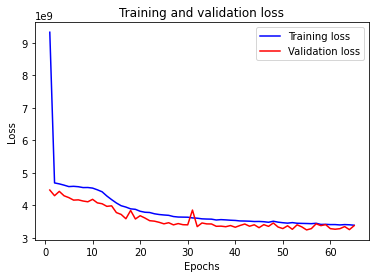

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

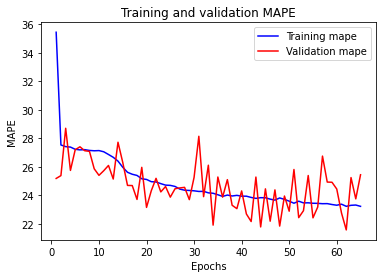

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

array([[174163.25],
       [219375.81],
       [ 89470.73],
       ...,
       [190265.23],
       [199027.92],
       [245891.19]], dtype=float32)

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))
# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

test R squared: 0.736
test MSE: 3614804294.306
tset MAPE: 0.232
